In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import sklearn.decomposition
import librosa
import librosa.display
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

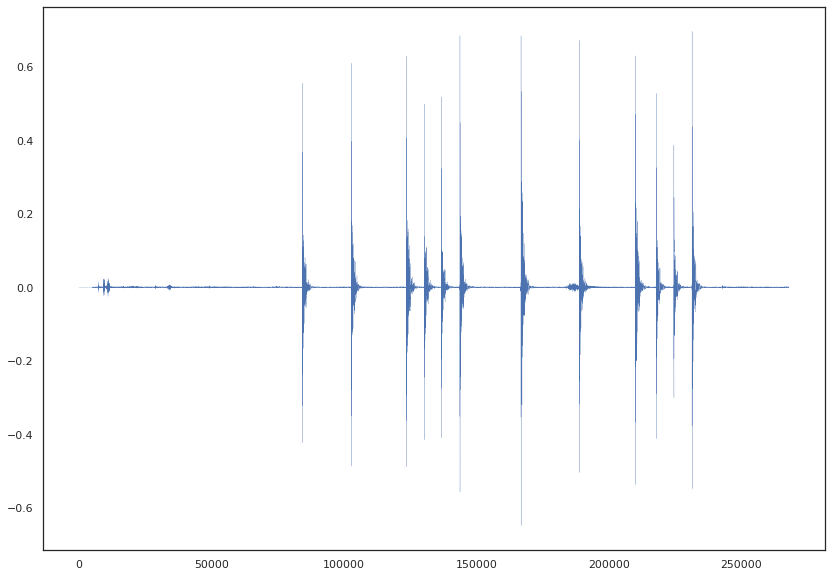

In [2]:
y2, sr2 = librosa.load('../datasets/hw3/knocks/knock0.wav')
plt.plot(y2, linewidth=.2)

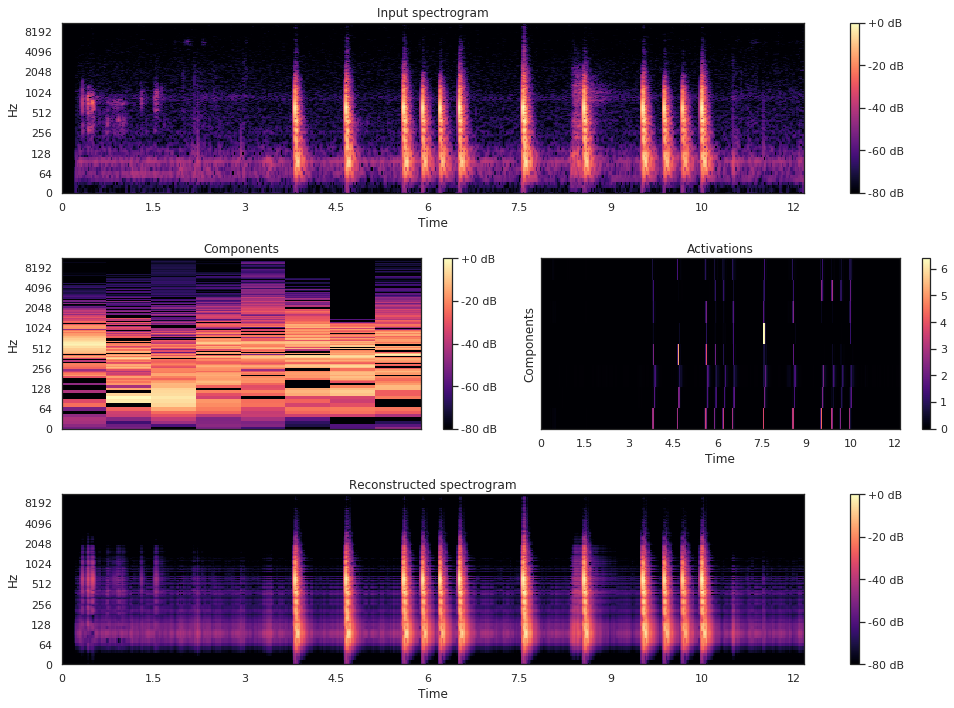

In [4]:
S2 = np.abs(librosa.stft(y2))
comps2, acts2 = librosa.decompose.decompose(S2, n_components=8)
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S2,
                                                 ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(comps2,
                                                 ref=np.max),
                         y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(acts2, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx2 = comps2.dot(acts2)
librosa.display.specshow(librosa.amplitude_to_db(S_approx2,
                                                 ref=np.max),
                         y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
plt.show()

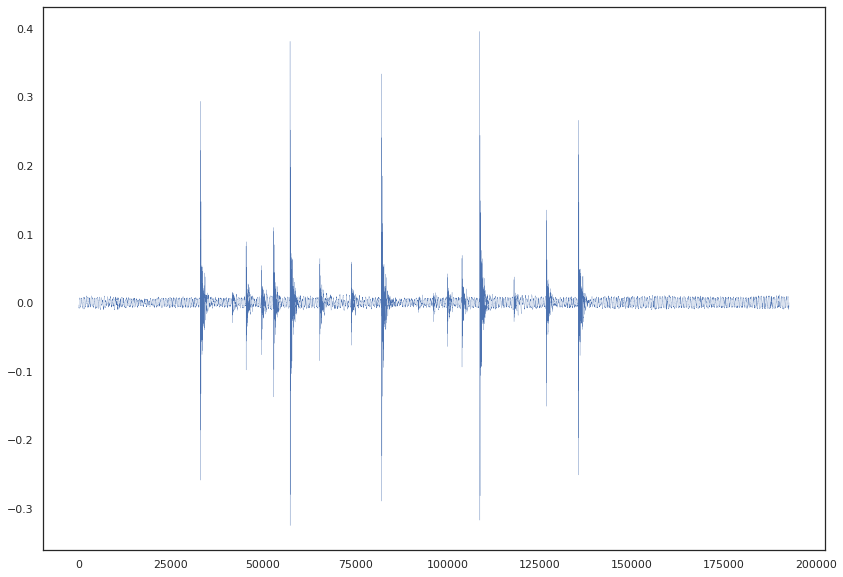

In [5]:
y_data, sr_data = [], []

for i in range(10):
    tmp_y, tmp_sr = librosa.load(f'../datasets/hw3/knocks/knock{i}.wav')
    y_data.append(tmp_y)
    sr_data.append(tmp_sr)
plt.plot(y_data[2], linewidth=.2)

In [6]:
tempos = []
beats_data = []
beats_time_data = []
for i in range(10):
    tmp_tempo, tmp_beat = librosa.beat.beat_track(y=y_data[i], sr=sr_data[i])
    tempos.append(tmp_tempo)
    beats_data.append(tmp_beat)
    beats_time_data.append(librosa.frames_to_time(tmp_beat, sr=sr_data[i]))    

In [7]:
beats_time_data

[array([ 4.06349206,  4.69043084,  5.31736961,  5.94430839,  6.54802721,
         7.05886621,  7.59292517,  8.17342404,  8.7539229 ,  9.33442177,
         9.91492063, 10.51863946]),
 array([ 1.16099773,  1.50929705,  1.88081633,  2.27555556,  2.67029478,
         3.06503401,  3.45977324,  3.85451247,  4.2492517 ,  4.62077098,
         5.0155102 ,  5.38702948,  5.7353288 ,  6.10684807,  6.47836735,
         6.87310658,  7.24462585,  7.66258503,  8.05732426,  8.47528345,
         8.84680272,  9.218322  ,  9.58984127,  9.96136054, 10.30965986,
        10.65795918, 10.98303855, 11.33133787, 11.67963719, 12.02793651,
        12.35301587, 12.67809524, 13.04961451, 13.42113379, 13.76943311,
        14.11773243, 14.46603175, 14.81433107, 15.16263039, 15.53414966,
        15.88244898, 16.25396825, 16.62548753, 16.95056689, 17.29886621,
        17.64716553, 17.99546485, 18.34376417, 18.71528345, 19.08680272,
        19.458322  , 19.82984127, 20.20136054, 20.57287982, 20.92117914,
        21.2926

In [13]:
max_len = 100

for i, el in enumerate(beats_time_data):
    next_el = np.zeros(max_len)
    next_el[:len(el)] = el
    beats_time_data[i] = next_el